In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def makehilbert(n):
    H=np.empty((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j]=1./(i+1.+j+1-1.)
    return H

In [108]:
def GSclassical(H):
    n=H.shape[0]
    Q=np.empty(H.shape)
    for k in range(n):
        Q[:,k]=H[:,k]
        for j in range(k):
            Q[:,k] = Q[:,k]-np.dot(Q[:,j],np.dot(Q[:,j].T,H[:,k]))
        if(np.linalg.norm(Q[:,k]) ==0):
            return Q
        Q[:,k] = Q[:,k]/np.linalg.norm(Q[:,k]) 
    return Q              

In [109]:
def GSmodified(H):
    n=H.shape[0]
    Q=np.empty(H.shape)
    for k in range(n):
        if(np.linalg.norm(Q[:,k]) ==0):
            return Q
        Q[:,k]=H[:,k]/np.linalg.norm(H[:,k]) 
        for j in range(k+1,n):
            H[:,j] = H[:,j]-np.dot(Q[:,k],np.dot(Q[:,k].T,H[:,j]))
    return Q              

In [110]:
def HHolder(H):
    n=H.shape[0]
    I=np.identity(n)
    Q=np.identity(n)
    for k in range(n):
        V=np.copy(H[:,k])
        V[0:k]=0
        sig=np.sign(H[k,k])
        if (sig==0):
            sig =1.
        alphak=-sig*np.linalg.norm(V)
        V[k]=V[k]-alphak
        betak=np.dot(V.T,V)
        if (betak==0):
            continue
        for j in range(k,n):
            gammaj=np.dot(V.T,H[:,j])
            H[:,j]=H[:,j]- (2.*gammaj/betak)*V
        
        Q=np.dot(I- (2./betak)*np.outer(V,V.T),Q)
    return Q.T

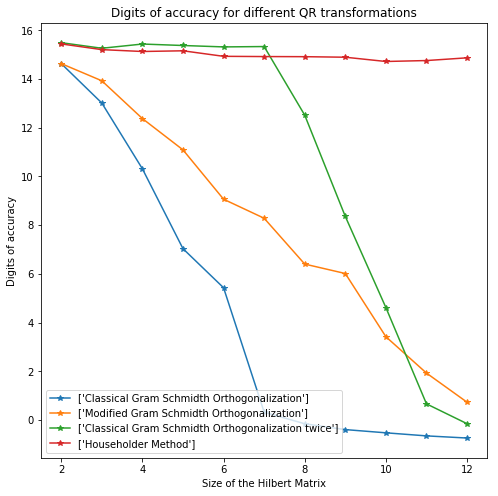

In [111]:
N=range(2,13)
hilbert=[]
digit_GS_classical=[]
digit_GS_modified=[]
digit_GS_classical2=[]
digit_HH=[]
for n in N:
    I = np.identity(n)
    H=makehilbert(n)
    H1=np.copy(H)
    hilbert.append(H)
    Q1=GSclassical(H1)
    digit_GS_classical.append(-np.log10(np.linalg.norm(I-np.dot(Q1.T,Q1))))
    Q2=GSclassical(Q1)
    digit_GS_classical2.append(-np.log10(np.linalg.norm(I-np.dot(Q2.T,Q2))))
    H2=np.copy(H1)
    Q3=GSmodified(H2)
    digit_GS_modified.append(-np.log10(np.linalg.norm(I-np.dot(Q3.T,Q3))))
    Q4=HHolder(H1)
    digit_HH.append(-np.log10(np.linalg.norm(I-np.dot(Q4.T,Q4))))
plt.figure(figsize=(8,8))
plt.plot(N,digit_GS_classical,'*-',label=['Classical Gram Schmidth Orthogonalization'])
plt.plot(N,digit_GS_modified,'*-',label=['Modified Gram Schmidth Orthogonalization'])
plt.plot(N,digit_GS_classical2,'*-',label=['Classical Gram Schmidth Orthogonalization twice'])
plt.plot(N,digit_HH,'*-',label=['Householder Method'])
plt.xlabel('Size of the Hilbert Matrix')
plt.ylabel('Digits of accuracy')
plt.title('Digits of accuracy for different QR transformations')
plt.legend()
plt.show()